In [366]:
library(dplyr)
library(tidyr)
library(caret)
library(readr)
library(randomForest)

german_credit <- read_csv("~/Desktop/Class/Analytical modeling/final exam/Exam2019- Dataset.csv")
head(german_credit,10)
summary(german_credit)
str(german_credit)

Parsed with column specification:
cols(
  .default = col_character(),
  Default = col_double(),
  duration = col_double(),
  amount = col_double(),
  installment = col_double(),
  residence = col_double(),
  age = col_double(),
  cards = col_double(),
  liable = col_double()
)
See spec(...) for full column specifications.


Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,⋯,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,⋯,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
0,A11,6,A34,A43,1169,A65,A75,4,A93,⋯,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,⋯,2,A121,22,A143,A152,1,A173,1,A191,A201
0,A14,12,A34,A46,2096,A61,A74,2,A93,⋯,3,A121,49,A143,A152,1,A172,2,A191,A201
0,A11,42,A32,A42,7882,A61,A74,2,A93,⋯,4,A122,45,A143,A153,1,A173,2,A191,A201
1,A11,24,A33,A40,4870,A61,A73,3,A93,⋯,4,A124,53,A143,A153,2,A173,2,A191,A201
0,A14,36,A32,A46,9055,A65,A73,2,A93,⋯,4,A124,35,A143,A153,1,A172,2,A192,A201
0,A14,24,A32,A42,2835,A63,A75,3,A93,⋯,4,A122,53,A143,A152,1,A173,1,A191,A201
0,A12,36,A32,A41,6948,A61,A73,2,A93,⋯,2,A123,35,A143,A151,1,A174,1,A192,A201
0,A14,12,A32,A43,3059,A64,A74,2,A91,⋯,4,A121,61,A143,A152,1,A172,1,A191,A201


    Default    checkingstatus1       duration      history         
 Min.   :0.0   Length:1000        Min.   : 4.0   Length:1000       
 1st Qu.:0.0   Class :character   1st Qu.:12.0   Class :character  
 Median :0.0   Mode  :character   Median :18.0   Mode  :character  
 Mean   :0.3                      Mean   :20.9                     
 3rd Qu.:1.0                      3rd Qu.:24.0                     
 Max.   :1.0                      Max.   :72.0                     
   purpose              amount        savings             employ         
 Length:1000        Min.   :  250   Length:1000        Length:1000       
 Class :character   1st Qu.: 1366   Class :character   Class :character  
 Mode  :character   Median : 2320   Mode  :character   Mode  :character  
                    Mean   : 3271                                        
                    3rd Qu.: 3972                                        
                    Max.   :18424                                        
  inst

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	1000 obs. of  21 variables:
 $ Default        : num  0 1 0 0 1 0 0 0 0 1 ...
 $ checkingstatus1: chr  "A11" "A12" "A14" "A11" ...
 $ duration       : num  6 48 12 42 24 36 24 36 12 30 ...
 $ history        : chr  "A34" "A32" "A34" "A32" ...
 $ purpose        : chr  "A43" "A43" "A46" "A42" ...
 $ amount         : num  1169 5951 2096 7882 4870 ...
 $ savings        : chr  "A65" "A61" "A61" "A61" ...
 $ employ         : chr  "A75" "A73" "A74" "A74" ...
 $ installment    : num  4 2 2 2 3 2 3 2 2 4 ...
 $ status         : chr  "A93" "A92" "A93" "A93" ...
 $ others         : chr  "A101" "A101" "A101" "A103" ...
 $ residence      : num  4 2 3 4 4 4 4 2 4 2 ...
 $ property       : chr  "A121" "A121" "A121" "A122" ...
 $ age            : num  67 22 49 45 53 35 53 35 61 28 ...
 $ otherplans     : chr  "A143" "A143" "A143" "A143" ...
 $ housing        : chr  "A152" "A152" "A152" "A153" ...
 $ cards          : num  2 1 1 1 2 1 1 1 1 2 ...
 $

In [367]:
# set random seed and seperate the data set into 80% train and 20% test
set.seed(1)
in.train <- createDataPartition(as.factor(german_credit$Default), p=0.8, list=FALSE)
german_credit.train <- german_credit[in.train,]
german_credit.test <- german_credit[-in.train,]

In [368]:
# we can see only some of the variable shows significant correlation with the dependent variable, 
# we need to choose a method to select the significant variables for modeling
glm.fit=glm(Default~., data=german_credit,family=binomial)
summary(glm.fit)


Call:
glm(formula = Default ~ ., family = binomial, data = german_credit)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3410  -0.6994  -0.3752   0.7095   2.6116  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         4.005e-01  1.084e+00   0.369 0.711869    
checkingstatus1A12 -3.749e-01  2.179e-01  -1.720 0.085400 .  
checkingstatus1A13 -9.657e-01  3.692e-01  -2.616 0.008905 ** 
checkingstatus1A14 -1.712e+00  2.322e-01  -7.373 1.66e-13 ***
duration            2.786e-02  9.296e-03   2.997 0.002724 ** 
historyA31          1.434e-01  5.489e-01   0.261 0.793921    
historyA32         -5.861e-01  4.305e-01  -1.362 0.173348    
historyA33         -8.532e-01  4.717e-01  -1.809 0.070470 .  
historyA34         -1.436e+00  4.399e-01  -3.264 0.001099 ** 
purposeA41         -1.666e+00  3.743e-01  -4.452 8.51e-06 ***
purposeA410        -1.489e+00  7.764e-01  -1.918 0.055163 .  
purposeA42         -7.916e-01  2.610e-01  -3.033 0.0

In [369]:
# There are many methods to select subset for predictors, e.g. stepwise forward, stepwise backward...
# we use chi-square to choose the significant variable, logic model it and drop the ones that not significant
# Chi-square test for significance of variables
# 11 variables: checkingstatus1,duration, history, purpose, amount,savings,installment,status,others, otherplans,foreign
drop1(credit.glm0, test ="Chisq")

,Df,Deviance,AIC,LRT,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,710.2452,808.2452,NA,NA
checkingstatus1,3,773.0553,865.0553,62.8101122,1.474581e-13
duration,1,717.1201,813.1201,6.8748797,8.741564e-03
history,4,726.6811,816.6811,16.4358914,2.486713e-03
purpose,9,741.6318,821.6318,31.3865928,2.540514e-04
amount,1,719.2676,815.2676,9.0223864,2.666930e-03
savings,4,725.6683,815.6683,15.4230698,3.899578e-03
employ,4,716.3022,806.3022,6.0570298,1.949295e-01
installment,1,720.3704,816.3704,10.1251753,1.462578e-03


In [370]:
# for our model we use below variables in the subset of predictors
#checkingstatus1
#duration
#history
#purpose
#amount
#savings
#installment
#status ----
#others
#otherplans
#foreign ----

In [371]:
# use logistic model
glm.fit = glm(Default~checkingstatus1+duration+history+purpose+amount+savings+installment+others+otherplans,data=german_credit.train,family=binomial)


In [372]:
summary(glm.fit)


Call:
glm(formula = Default ~ checkingstatus1 + duration + history + 
    purpose + amount + savings + installment + others + otherplans, 
    family = binomial, data = german_credit.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1965  -0.7482  -0.4443   0.8340   2.6015  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         5.135e-02  5.934e-01   0.087  0.93104    
checkingstatus1A12 -1.417e-01  2.308e-01  -0.614  0.53915    
checkingstatus1A13 -7.595e-01  3.811e-01  -1.993  0.04627 *  
checkingstatus1A14 -1.477e+00  2.419e-01  -6.105 1.03e-09 ***
duration            2.844e-02  9.963e-03   2.854  0.00431 ** 
historyA31          2.389e-01  5.692e-01   0.420  0.67466    
historyA32         -5.456e-01  4.413e-01  -1.236  0.21636    
historyA33         -8.689e-01  5.064e-01  -1.716  0.08617 .  
historyA34         -1.429e+00  4.665e-01  -3.064  0.00218 ** 
purposeA41         -1.214e+00  3.848e-01  -3.155  0.00161 **

# Model Evaluation

In [373]:
glm.probs = predict(glm.fit,german_credit.test, type='response')

In [374]:
#Confusion Matrix
glm.pred=rep('Bad',200)
glm.pred[glm.probs>0.50]='Good'
german_credit_default=rep('Bad',200)
german_credit_default[german_credit.test$Default==1]='Good'
table(glm.pred,german_credit_default)

        german_credit_default
glm.pred Bad Good
    Bad  121   25
    Good  19   35

In [375]:
misclassification_rate=(20+28)/200
accuracy=(132+28)/200
precision=32/(28+32)
recall=32/(32+28)
misclassification_rate
accuracy
recall
precision

[1] 0.24

[1] 0.8

[1] 0.5333333

[1] 0.5333333

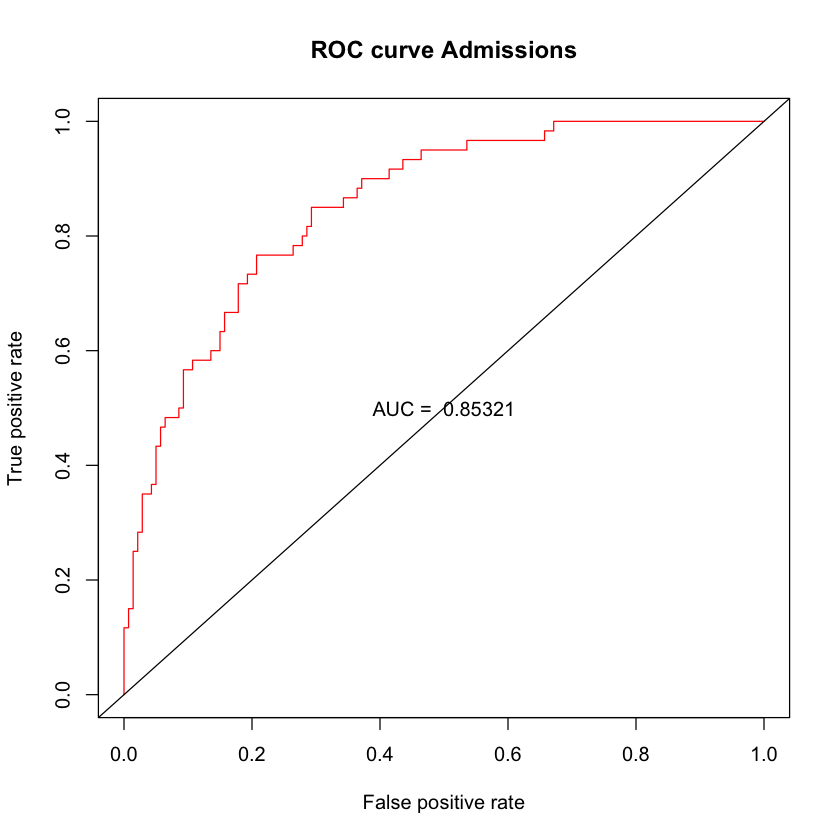

In [376]:
library(ROCR)
pred <- prediction(glm.probs,german_credit.test$Default) 
perf <- performance(pred, measure = "tpr", x.measure = "fpr")     
plot(perf, col=rainbow(7), main="ROC curve Admissions")    
abline(0, 1)
auc.perf = performance(pred, measure = "auc")
AUC=auc.perf@y.values
text(0.5,0.5,paste("AUC = ",format(AUC, digits=5, scientific=FALSE)))
# An excellent model has AUC near to the 1 which means it has good measure of separability. 
# A poor model has AUC near to the 0 which means it has worst measure of separability.
# Thus, if we can only accept a FPR of 10%, the model is only giving 50% sensitivity (TPR) at 10% FPR (1-specificity).

In [377]:
# why not KNN

In [378]:
# don't use KNN because KNN require numerical variables predictors, although we can convert categorical varible
# to numerical dummy, dummy varibles assumes wrong distance between different values, also since many variables 
# are categorical which needed to be converted, the accuracy of the KNN model will be highly comprimised and 
# therefore in this case we will not use KNN

# Random Forest

In [379]:
german_credit <- read_csv("~/Desktop/Class/Analytical modeling/final exam/Exam2019- Dataset.csv")
library(dplyr)

Parsed with column specification:
cols(
  .default = col_character(),
  Default = col_double(),
  duration = col_double(),
  amount = col_double(),
  installment = col_double(),
  residence = col_double(),
  age = col_double(),
  cards = col_double(),
  liable = col_double()
)
See spec(...) for full column specifications.


In [380]:
a <- 1:21
a

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21

In [381]:
x <- 
count <- 0
for (i in a) {
german_credit[,i]=german_credit[,i] %>% mutate_if(is.character, as.factor)
}
for (i in a) {
german_credit[,i]=german_credit[,i] %>% mutate_if(is.numeric, as.factor)
}



In [382]:
summary(german_credit)
str(german_credit)

 Default checkingstatus1    duration   history      purpose        amount   
 0:700   A11:274         24     :184   A30: 40   A43    :280   1258   :  3  
 1:300   A12:269         12     :179   A31: 49   A40    :234   1262   :  3  
         A13: 63         18     :113   A32:530   A42    :181   1275   :  3  
         A14:394         36     : 83   A33: 88   A41    :103   1393   :  3  
                         6      : 75   A34:293   A49    : 97   1478   :  3  
                         15     : 64             A46    : 50   433    :  2  
                         (Other):302             (Other): 55   (Other):983  
 savings   employ    installment status     others    residence property  
 A61:603   A71: 62   1:136       A91: 50   A101:907   1:130     A121:282  
 A62:103   A72:172   2:231       A92:310   A102: 41   2:308     A122:232  
 A63: 63   A73:339   3:157       A93:548   A103: 52   3:149     A123:332  
 A64: 48   A74:174   4:476       A94: 92              4:413     A124:154  
 A65:183 

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	1000 obs. of  21 variables:
 $ Default        : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 1 1 2 ...
 $ checkingstatus1: Factor w/ 4 levels "A11","A12","A13",..: 1 2 4 1 1 4 4 2 4 2 ...
 $ duration       : Factor w/ 33 levels "4","5","6","7",..: 3 30 9 27 18 24 18 24 9 22 ...
 $ history        : Factor w/ 5 levels "A30","A31","A32",..: 5 3 5 3 4 3 3 3 3 5 ...
 $ purpose        : Factor w/ 10 levels "A40","A41","A410",..: 5 5 8 4 1 8 4 2 5 1 ...
 $ amount         : Factor w/ 921 levels "250","276","338",..: 143 771 391 849 735 870 534 814 563 748 ...
 $ savings        : Factor w/ 5 levels "A61","A62","A63",..: 5 1 1 1 1 5 3 1 4 1 ...
 $ employ         : Factor w/ 5 levels "A71","A72","A73",..: 5 3 4 4 3 3 5 3 4 1 ...
 $ installment    : Factor w/ 4 levels "1","2","3","4": 4 2 2 2 3 2 3 2 2 4 ...
 $ status         : Factor w/ 4 levels "A91","A92","A93",..: 3 2 3 3 3 3 3 3 1 4 ...
 $ others         : Factor w/ 3 levels "A101","A102",

In [383]:
# seperate data to train(80%) and test(20%) set
set.seed(1)
in.train <- createDataPartition(german_credit$Default, p=0.8, list=FALSE)
german_credit.train <- german_credit[in.train,]
german_credit.test <- german_credit[-in.train,]

In [384]:
model_rf <- randomForest(Default~.-amount-employ-job-cards-tele-age-property, data = german_credit.train,importance = TRUE)

In [385]:
#By default, number of trees is 500 and number of variables tried at each split is 3 in this case. Error rate is 27.38%.
model_rf


Call:
 randomForest(formula = Default ~ . - amount - employ - job -      cards - tele - age - property, data = german_credit.train,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 26.88%
Confusion matrix:
    0   1 class.error
0 485  75   0.1339286
1 140 100   0.5833333

In [386]:
# We will now predict on the train dataset first and then predict on validation dataset.
# Predicting on train set
predTrain <- predict(model_rf,german_credit.train, type = "class")
# Checking classification accuracy
table(predTrain, german_credit.train$Default)  

         
predTrain   0   1
        0 560   7
        1   0 233

In [387]:
# Predicting on Validation set
predTest <- predict(model_rf, german_credit.test)
# Checking classification accuracy
mean(predTest == german_credit.test$Default)   
table(predTest,german_credit.test$Default)

[1] 0.78

        
predTest   0   1
       0 123  27
       1  17  33

In [388]:
predTest

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  0   0   0   1   1   1   0   0   0   0   1   0   0   0   0   0   0   0   1   0 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  0   0   0   1   1   0   1   0   0   0   0   0   0   1   0   1   0   1   0   0 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   0   0   0   0   0   1   1   1   0   0   1   0   0   0   0   0   0   0   0 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   1   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   1   0   0 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  0   1   1   0   0   0   0   0   0   0   1   0   1   0   0   0   0   0   0   0 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  0   0   1   0   0   1   0   1   0   1   0   1   1   0   0   0   0   0   0   0 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  0   0   1   1   0   0   1   0   0   0   0   1   0   0   0   0   0   1   0   0 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  1   0   1   0   1   0   0   0   0   1   0   0   1   1   0   1   0   0   0   0 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  0   0   0   1   1   0   0   0   0   1   0   0   0   0   1   0   0   0   1   1 
Levels: 0 1

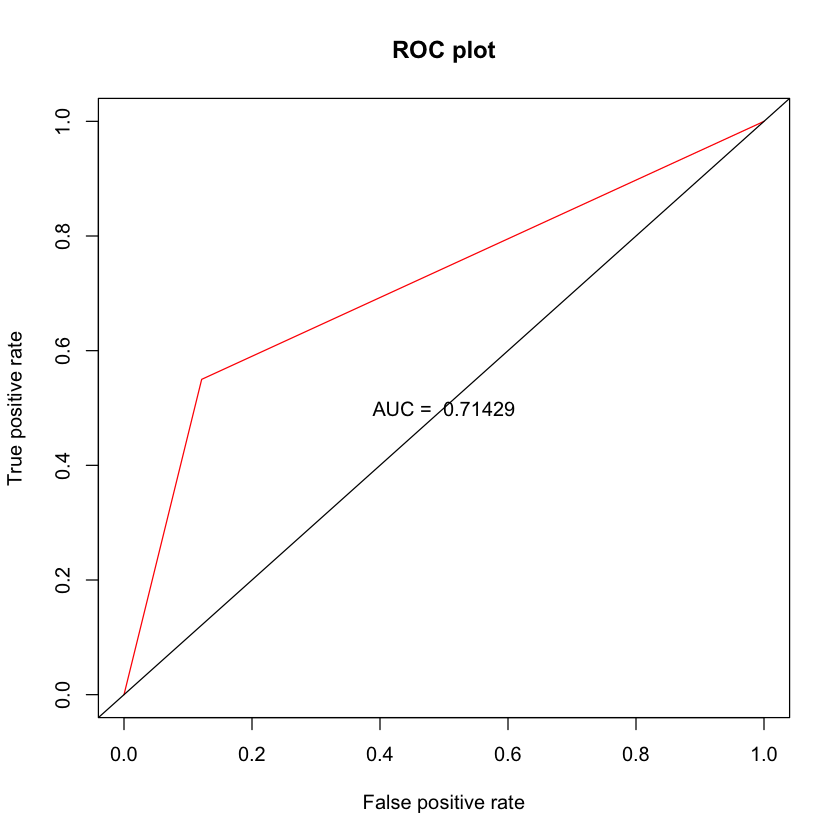

In [389]:
pred <- prediction(as.numeric(predTest), as.numeric(german_credit.test$Default))
perf_AUC=performance(pred,"auc") #Calculate the AUC value
AUC=perf_AUC@y.values[[1]]
perf_ROC=performance(pred,"tpr","fpr") #plot the actual ROC curve
plot(perf_ROC,col=rainbow(7), main="ROC plot")
abline(0, 1)
text(0.5,0.5,paste("AUC = ",format(AUC, digits=5, scientific=FALSE)))

